In [1]:
import pickle
from models import Model2_2
from tools import GridSearch

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

# Model 2

In [6]:
basic_params = {
    'T': 60,
    'n': 40,
}

param_grid = {
    'skip_hidden_size': [32, 40],
    'T_modified': [20, 30],
    'skip': [8, 10]
}

model_name = 'model2_2'
grid_model2 = GridSearch(criterion, eval_metrics, device, temp_save_path=f'checkpoints/model_by_param/temp_{model_name}.pt', masked=False)
best_model2 = grid_model2.train_by_grid(
        Model2_2, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total   8 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 19: 100%|██████████| 2607/2607 [00:09<00:00, 279.25it/s, Train Loss=0.8620, Valid Loss=0.2511, Valid R2=0.4335, Valid MAE=0.4178]


Setting   1 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [00:09<00:00, 287.44it/s, Train Loss=0.8051, Valid Loss=0.2109, Valid R2=0.5241, Valid MAE=0.3591]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:09<00:00, 275.57it/s, Train Loss=0.8013, Valid Loss=0.2657, Valid R2=0.4005, Valid MAE=0.4380]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:09<00:00, 270.45it/s, Train Loss=0.7836, Valid Loss=0.2418, Valid R2=0.4544, Valid MAE=0.4021]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:09<00:00, 274.61it/s, Train Loss=0.8692, Valid Loss=0.2204, Valid R2=0.5027, Valid MAE=0.3752]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:09<00:00, 272.76it/s, Train Loss=0.8184, Valid Loss=0.2996, Valid R2=0.3239, Valid MAE=0.4505]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:09<00:00, 267.62it/s, Train Loss=0.8419, Valid Loss=0.3086, Valid R2=0.3037, Valid MAE=0.4475]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:09<00:00, 273.38it/s, Train Loss=0.7768, Valid Loss=0.2272, Valid R2=0.4872, Valid MAE=0.3867]

Early Stopped
{'skip_hidden_size': 40, 'T_modified': 20, 'skip': 10}


Test Loss: 0.2762 | Test R2: 0.8500 | Test MAE: 0.4406
Saving Process Complete. Directory: model2_2_losses.png


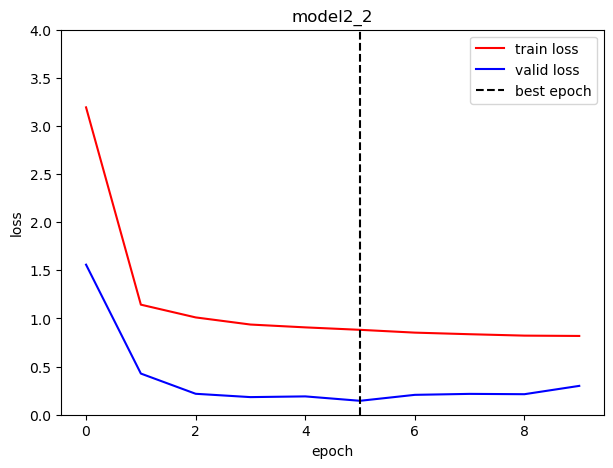

In [7]:
grid_model2.test(test_loader)
grid_model2.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')